Texture = sand
Volumetric water content @ -33 kPa =  0.06 cm^3/cm^3
Volumetric water content @ -1500 kPa =  0.02 cm^3/cm^3
Plant available water =  0.04 cm^3/cm^3
Saturated hydraulic conductivity =  3.36 cm/hr
Rating = high


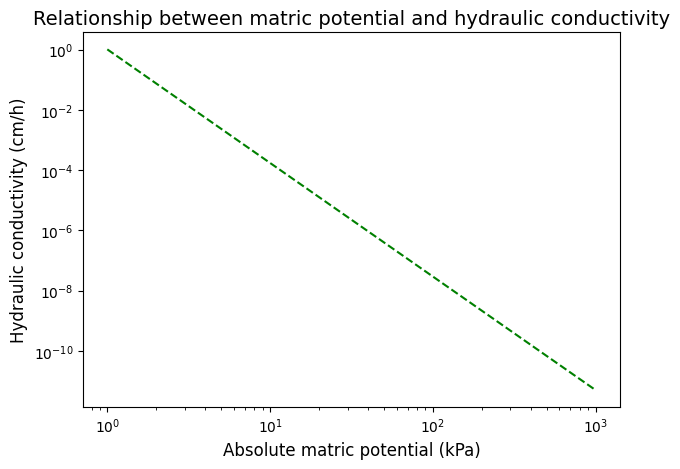

In [1]:
##Saturated hydraulic conductivity of different textural classes

import math
import numpy as np

clay_frac = 0.05                                 #Variable
silt_frac = 0.05                                 #Variable
sand_frac = 1 - (clay_frac + silt_frac)

##Calculation of geometric mean diameter and hydraulic properties

dg = np.exp(sand_frac * (5.76) + silt_frac * (2.3) + clay_frac * (-1.96))      #Equation_2.36
psi_e = 0.61 * np.log(dg) - 3.9                                                #Equation_5.36
b = 8.25 - 1.26 * np.log(dg)                                                   #Equation_5.37

psi_m = np.logspace(0, 3, 100)     #logarithmic sequence of matric potential values used for plotting unsaturated K


##Using the USDA Soil Textural Classes:

#psi_e for all texture are calculated from geometric mean diameter
#Calculation of soil volumetric water content using van Genuchten Model
#Soil water retention curve parameters for van Genuchten's and modified van Genuchten's equations (Tabe 5.4--Bittelli et al., 2015)


if clay_frac >= 0.4 and silt_frac <= 0.4 and sand_frac <= 0.45:
    print('Texture = clay')
    alpha = 0.17
    n = 1.16
    m = 1 - (1/n)
    theta_r = 0.07
    theta_s = 0.5
    volumetric_water_content_33kPa = theta_r + (theta_s - theta_r) * (1/(1+(alpha*33)**n)**m)
    volumetric_water_content_1500kPa = theta_r + (theta_s - theta_r) * (1/(1+(alpha*1500)**n)**m)
    plant_available_water = volumetric_water_content_33kPa - volumetric_water_content_1500kPa
    Ks = (0.07 * (theta_s * (1 - (-psi_e/33)**(1/b)))**4) * 3600                                                 #Equation_6.34
    K = np.piecewise(-psi_m, [-psi_m < psi_e, -psi_m >= psi_e], [lambda x: Ks*(psi_e/x)**(2+3/b), Ks])    #Equation_6.35

elif clay_frac >= 0.4 and clay_frac <= 0.6 and silt_frac >= 0.4 and silt_frac <= 0.6 and sand_frac < 0.2:
    print('Texture = silty clay')
    alpha = 0.18
    n = 1.16
    m = 1 - (1/n)
    theta_r = 0.06
    theta_s = 0.5
    volumetric_water_content_33kPa = theta_r + (theta_s - theta_r) * (1/(1+(alpha*33)**n)**m)
    volumetric_water_content_1500kPa = theta_r + (theta_s - theta_r) * (1/(1+(alpha*1500)**n)**m)
    plant_available_water = volumetric_water_content_33kPa - volumetric_water_content_1500kPa
    Ks = (0.07 * (theta_s * (1 - (-psi_e/33)**(1/b)))**4) * 3600                                                 #Equation_6.34
    K = np.piecewise(-psi_m, [-psi_m < psi_e, -psi_m >= psi_e], [lambda x: Ks*(psi_e/x)**(2+3/b), Ks])    #Equation_6.35

elif clay_frac <= 0.27 and silt_frac >= 0.5 and silt_frac <= 0.8 and sand_frac <= 0.5:
    print('Texture = silt loam')
    alpha = 0.14
    n = 1.2
    m = 1 - (1/n)
    theta_r = 0.05
    theta_s = 0.44
    volumetric_water_content_33kPa = theta_r + (theta_s - theta_r) * (1/(1+(alpha*33)**n)**m)
    volumetric_water_content_1500kPa = theta_r + (theta_s - theta_r) * (1/(1+(alpha*1500)**n)**m)
    plant_available_water = volumetric_water_content_33kPa - volumetric_water_content_1500kPa
    Ks = (0.07 * (theta_s * (1 - (-psi_e/33)**(1/b)))**4) * 3600                                                 #Equation_6.34
    K = np.piecewise(-psi_m, [-psi_m < psi_e, -psi_m >= psi_e], [lambda x: Ks*(psi_e/x)**(2+3/b), Ks])    #Equation_6.35

elif clay_frac >= 0.35 and clay_frac <= 0.55 and silt_frac <= 0.2 and sand_frac >= 0.45 and sand_frac < 0.65:
    print('Texture = sandy clay')
    alpha = 0.22
    n = 1.18
    m = 1 - (1/n)
    theta_r = 0.07
    theta_s = 0.44
    volumetric_water_content_33kPa = theta_r + (theta_s - theta_r) * (1/(1+(alpha*33)**n)**m)
    volumetric_water_content_1500kPa = theta_r + (theta_s - theta_r) * (1/(1+(alpha*1500)**n)**m)
    plant_available_water = volumetric_water_content_33kPa - volumetric_water_content_1500kPa
    Ks = (0.07 * (theta_s * (1 - (-psi_e/33)**(1/b)))**4) * 3600                                                 #Equation_6.34
    K = np.piecewise(-psi_m, [-psi_m < psi_e, -psi_m >= psi_e], [lambda x: Ks*(psi_e/x)**(2+3/b), Ks])    #Equation_6.35

elif clay_frac >= 0.27 and clay_frac <= 0.4 and silt_frac >= 0.15 and silt_frac <= 0.52 and sand_frac >= 0.2 and sand_frac <= 0.45:
    print('Texture = clay loam')
    alpha = 0.19
    n = 1.18
    m = 1 - (1/n)
    theta_r = 0.06
    theta_s = 0.45
    volumetric_water_content_33kPa = theta_r + (theta_s - theta_r) * (1/(1+(alpha*33)**n)**m)
    volumetric_water_content_1500kPa = theta_r + (theta_s - theta_r) * (1/(1+(alpha*1500)**n)**m)
    plant_available_water = volumetric_water_content_33kPa - volumetric_water_content_1500kPa
    Ks = (0.07 * (theta_s * (1 - (-psi_e/33)**(1/b)))**4) * 3600                                                 #Equation_6.34
    K = np.piecewise(-psi_m, [-psi_m < psi_e, -psi_m >= psi_e], [lambda x: Ks*(psi_e/x)**(2+3/b), Ks])    #Equation_6.35

elif clay_frac >= 0.27 and clay_frac <= 0.4 and silt_frac >= 0.4 and silt_frac <= 0.73 and sand_frac < 0.2:
    print('Texture = silty clay loam')
    alpha = 0.14
    n = 1.2
    m = 1 - (1/n)
    theta_r = 0.05
    theta_s = 0.46
    volumetric_water_content_33kPa = theta_r + (theta_s - theta_r) * (1/(1+(alpha*33)**n)**m)
    volumetric_water_content_1500kPa = theta_r + (theta_s - theta_r) * (1/(1+(alpha*1500)**n)**m)
    plant_available_water = volumetric_water_content_33kPa - volumetric_water_content_1500kPa
    Ks = (0.07 * (theta_s * (1 - (-psi_e/33)**(1/b)))**4) * 3600                                                 #Equation_6.34
    K = np.piecewise(-psi_m, [-psi_m < psi_e, -psi_m >= psi_e], [lambda x: Ks*(psi_e/x)**(2+3/b), Ks])    #Equation_6.35

elif clay_frac >= 0.2 and clay_frac <= 0.35 and silt_frac <= 0.28 and sand_frac >= 0.45 and sand_frac <= 0.8:
    print('Texture = sandy clay loam')
    alpha = 0.23
    n = 1.22
    m = 1 - (1/n)
    theta_r = 0.05
    theta_s = 0.41
    volumetric_water_content_33kPa = theta_r + (theta_s - theta_r) * (1/(1+(alpha*33)**n)**m)
    volumetric_water_content_1500kPa = theta_r + (theta_s - theta_r) * (1/(1+(alpha*1500)**n)**m)
    plant_available_water = volumetric_water_content_33kPa - volumetric_water_content_1500kPa
    Ks = (0.07 * (theta_s * (1 - (-psi_e/33)**(1/b)))**4) * 3600                                                 #Equation_6.34
    K = np.piecewise(-psi_m, [-psi_m < psi_e, -psi_m >= psi_e], [lambda x: Ks*(psi_e/x)**(2+3/b), Ks])    #Equation_6.35

elif clay_frac >= 0.07 and clay_frac <= 0.27 and silt_frac >= 0.28 and silt_frac <= 0.5 and sand_frac >= 0.23 and sand_frac <= 0.52:
    print('Texture = loam')
    alpha = 0.18
    n = 1.21
    m = 1 - (1/n)
    theta_r = 0.05
    theta_s = 0.42
    volumetric_water_content_33kPa = theta_r + (theta_s - theta_r) * (1/(1+(alpha*33)**n)**m)
    volumetric_water_content_1500kPa = theta_r + (theta_s - theta_r) * (1/(1+(alpha*1500)**n)**m)
    plant_available_water = volumetric_water_content_33kPa - volumetric_water_content_1500kPa
    Ks = (0.07 * (theta_s * (1 - (-psi_e/33)**(1/b)))**4) * 3600                                                 #Equation_6.34
    K = np.piecewise(-psi_m, [-psi_m < psi_e, -psi_m >= psi_e], [lambda x: Ks*(psi_e/x)**(2+3/b), Ks])    #Equation_6.35

elif clay_frac <= 0.12 and silt_frac >= 0.8 and silt_frac <= 1 and sand_frac <= 0.2:
    print('Texture = silt')
    alpha = 0.08
    n = 1.24
    m = 1 - (1/n)
    theta_r = 0.04
    theta_s = 0.44
    volumetric_water_content_33kPa = theta_r + (theta_s - theta_r) * (1/(1+(alpha*33)**n)**m)
    volumetric_water_content_1500kPa = theta_r + (theta_s - theta_r) * (1/(1+(alpha*1500)**n)**m)
    plant_available_water = volumetric_water_content_33kPa - volumetric_water_content_1500kPa
    Ks = (0.07 * (theta_s * (1 - (-psi_e/33)**(1/b)))**4) * 3600                                                 #Equation_6.34
    K = np.piecewise(-psi_m, [-psi_m < psi_e, -psi_m >= psi_e], [lambda x: Ks*(psi_e/x)**(2+3/b), Ks])    #Equation_6.35

elif clay_frac <= 0.2 and silt_frac <= 0.5 and sand_frac >= 0.5 and sand_frac <= 0.7:
    print('Texture = sandy loam')
    alpha = 0.39
    n = 1.4
    m = 1 - (1/n)
    theta_r = 0.05
    theta_s = 0.4
    volumetric_water_content_33kPa = theta_r + (theta_s - theta_r) * (1/(1+(alpha*33)**n)**m)
    volumetric_water_content_1500kPa = theta_r + (theta_s - theta_r) * (1/(1+(alpha*1500)**n)**m)
    plant_available_water = volumetric_water_content_33kPa - volumetric_water_content_1500kPa
    Ks = (0.07 * (theta_s * (1 - (-psi_e/33)**(1/b)))**4) * 3600                                                 #Equation_6.34
    K = np.piecewise(-psi_m, [-psi_m < psi_e, -psi_m >= psi_e], [lambda x: Ks*(psi_e/x)**(2+3/b), Ks])    #Equation_6.35

elif clay_frac <= 0.1 and silt_frac <= 0.14 and sand_frac >= 0.86 and sand_frac <= 1:
    print('Texture = sand')
    alpha = 0.68
    n = 1.7
    m = 1 - (1/n)
    theta_r = 0.02
    theta_s = 0.38
    volumetric_water_content_33kPa = theta_r + (theta_s - theta_r) * (1/(1+(alpha*33)**n)**m)
    volumetric_water_content_1500kPa = theta_r + (theta_s - theta_r) * (1/(1+(alpha*1500)**n)**m)
    plant_available_water = volumetric_water_content_33kPa - volumetric_water_content_1500kPa
    Ks = (0.07 * (theta_s * (1 - (-psi_e/33)**(1/b)))**4) * 3600                                                 #Equation_6.34
    K = np.piecewise(-psi_m, [-psi_m < psi_e, -psi_m >= psi_e], [lambda x: Ks*(psi_e/x)**(2+3/b), Ks])    #Equation_6.35

else:
    print('Texture = loamy sand')
    alpha = 0.49
    n = 1.5
    m = 1 - (1/n)
    theta_r = 0.03
    theta_s = 0.39
    volumetric_water_content_33kPa = theta_r + (theta_s - theta_r) * (1/(1+(alpha*33)**n)**m)
    volumetric_water_content_1500kPa = theta_r + (theta_s - theta_r) * (1/(1+(alpha*1500)**n)**m)
    plant_available_water = volumetric_water_content_33kPa - volumetric_water_content_1500kPa
    Ks = (0.07 * (theta_s * (1 - (-psi_e/33)**(1/b)))**4) * 3600                                                 #Equation_6.34
    K = np.piecewise(-psi_m, [-psi_m < psi_e, -psi_m >= psi_e], [lambda x: Ks*(psi_e/x)**(2+3/b), Ks])    #Equation_6.35

print('Volumetric water content @ -33 kPa = ', round (volumetric_water_content_33kPa, 2), 'cm^3/cm^3')
print('Volumetric water content @ -1500 kPa = ', round (volumetric_water_content_1500kPa, 2), 'cm^3/cm^3')
print('Plant available water = ', round(plant_available_water, 2), 'cm^3/cm^3')
print('Saturated hydraulic conductivity = ', round (Ks, 2), 'cm/hr')

##Ks ratings from the USDA-NRCS

if Ks > 2.5:
    print('Rating = high')
elif Ks > 1.25 and Ks <= 2.5:
    print('Rating = medium')
elif Ks > 0.25 and Ks <= 1.25:
    print('Rating = low')
else:
    print('Rating = very low')


##Plotting of K

import matplotlib.pyplot as plt

plt.loglog(psi_m, K, color='green', linestyle='--')
plt.xlabel('Absolute matric potential (kPa)', fontsize=12)
plt.ylabel('Hydraulic conductivity (cm/h)', fontsize=12)
plt.title('Relationship between matric potential and hydraulic conductivity', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.tick_params(axis='both', which='minor', labelsize=8)
plt.tight_layout()
plt.show()